In [11]:
import pandas as pd 
import numpy as np 
import plotly.express as  px 
import seaborn as sns 

In [3]:
df = pd.read_csv('healthcare_sale.csv')

In [4]:
df.head()

,product_id,region,doctor_id,sales_amount,marketing_channel,date
0,1015,West,209,3505,Social Media,2023-01-01 00:00:00
1,1008,West,258,1015,Social Media,2023-01-01 00:01:00
2,1009,South,211,4744,Email,2023-01-01 00:02:00
3,1008,West,273,3718,Events,2023-01-01 00:03:00
4,1006,South,223,3606,Events,2023-01-01 00:04:00


In [4]:
df.shape

(100000, 6)

In [5]:
df.describe()

,product_id,doctor_id,sales_amount
count,100000.000000,100000.000000,100000.000000
mean,1009.512880,249.444810,2754.157690
std,5.774791,28.922124,1297.190939
min,1000.000000,200.000000,500.000000
25%,1004.000000,224.000000,1636.000000
50%,1010.000000,249.000000,2755.000000
75%,1015.000000,274.000000,3877.000000
max,1019.000000,299.000000,4999.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   product_id         100000 non-null  int64 
 1   region             100000 non-null  object
 2   doctor_id          100000 non-null  int64 
 3   sales_amount       100000 non-null  int64 
 4   marketing_channel  100000 non-null  object
 5   date               100000 non-null  object
dtypes: int64(3), object(3)
memory usage: 4.6+ MB


In [7]:
df.isnull().sum()

product_id           0
region               0
doctor_id            0
sales_amount         0
marketing_channel    0
date                 0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [13]:
df.sample(5)

,product_id,region,doctor_id,sales_amount,marketing_channel,date
29425,1010,West,282,4432,Email,2023-01-21 10:25:00
47059,1017,North,284,2970,Direct Sales,2023-02-02 16:19:00
33794,1010,North,290,4905,Direct Sales,2023-01-24 11:14:00
46457,1018,West,226,1764,Events,2023-02-02 06:17:00
2528,1006,North,224,4451,Email,2023-01-02 18:08:00


In [14]:
df['region'].value_counts()

region
South    25030
North    25018
West     24979
East     24973
Name: count, dtype: int64

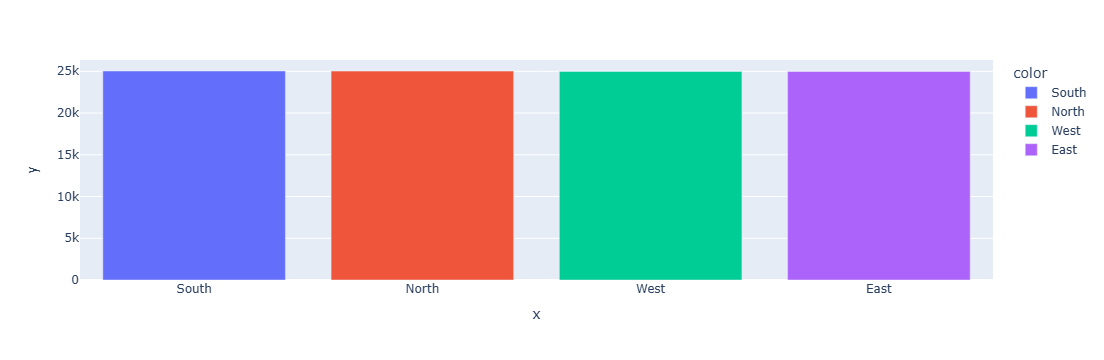

In [16]:
px.bar(x=df['region'].value_counts().index , y=df['region'].value_counts().values  , color = df['region'].value_counts().index)

In [21]:
df.groupby('region')['sales_amount'].sum().sort_index(ascending=False)

region
West     68853774
South    68801481
North    69113022
East     68647492
Name: sales_amount, dtype: int64

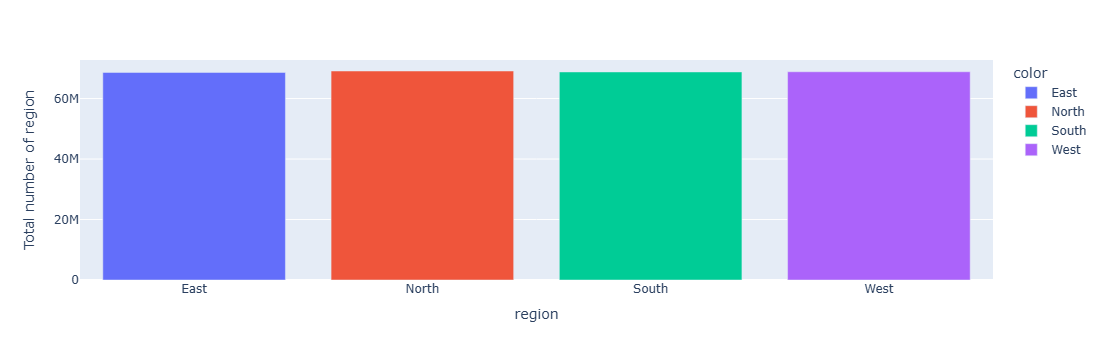

In [24]:
px.bar(x=df.groupby('region')['sales_amount'].sum().index , y=df.groupby('region')['sales_amount'].sum().values ,
       color =df.groupby('region')['sales_amount'].sum().index , 
       labels={"x":"region" , "y":"Total number of region"}
               )

In [22]:
df['marketing_channel'].value_counts()

marketing_channel
Social Media    30032
Email           29990
Direct Sales    20085
Events          19893
Name: count, dtype: int64

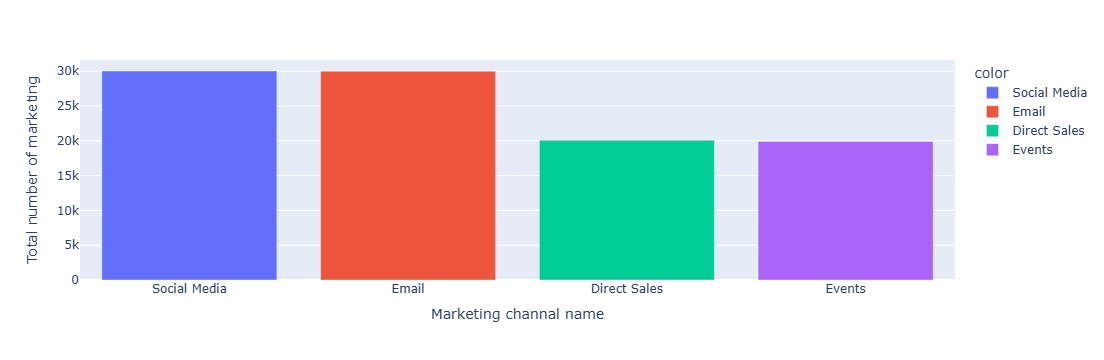

In [26]:
px.bar(x=df['marketing_channel'].value_counts().index , 
       y=df['marketing_channel'].value_counts().values , 
       color = df['marketing_channel'].value_counts().index , 
       labels={"x":"Marketing channal name " , "y":"Total number of marketing"})

In [27]:
df.head()

,product_id,region,doctor_id,sales_amount,marketing_channel,date
0,1015,West,209,3505,Social Media,2023-01-01 00:00:00
1,1008,West,258,1015,Social Media,2023-01-01 00:01:00
2,1009,South,211,4744,Email,2023-01-01 00:02:00
3,1008,West,273,3718,Events,2023-01-01 00:03:00
4,1006,South,223,3606,Events,2023-01-01 00:04:00


In [32]:
df.groupby('region')['sales_amount'].sum()

region
East     68647492
North    69113022
South    68801481
West     68853774
Name: sales_amount, dtype: int64

In [34]:
len(df['doctor_id'].value_counts())

100

In [37]:
bc = pd.read_csv('healthcare.csv')

In [38]:
bc.head()

,patient_id,age,gender,test_type,result,doctor_id,date
0,1,56,Male,Hemoglobin,14.8,102,2023-01-01 00:00:00
1,2,69,Female,Ovulation,18.5,198,2023-01-01 00:01:00
2,3,46,Male,Ovulation,13.3,101,2023-01-01 00:02:00
3,4,32,Female,Sperm_Count,45.3,126,2023-01-01 00:03:00
4,5,60,Female,Ovulation,12.1,181,2023-01-01 00:04:00


In [39]:
df.columns

Index(['product_id', 'region', 'doctor_id', 'sales_amount',
       'marketing_channel', 'date'],
      dtype='object')

In [42]:
sales_by_product = df.groupby('doctor_id')['sales_amount'].sum().reset_index()
print(sales_by_product)

    doctor_id  sales_amount
0         200       2828863
1         201       2846161
2         202       2720206
3         203       2639961
4         204       2830546
..        ...           ...
95        295       2679598
96        296       2855328
97        297       2710714
98        298       2955221
99        299       2759945

[100 rows x 2 columns]


In [43]:
top_doctors = df.groupby('doctor_id')['sales_amount'].sum().reset_index().sort_values(by='sales_amount', ascending=False).head(5)
print(top_doctors)

    doctor_id  sales_amount
72        272       3051946
66        266       2975588
98        298       2955221
8         208       2949567
62        262       2939479


In [44]:
df['date'] = pd.to_datetime(df['date'])
sales_over_time = df.groupby(df['date'].dt.to_period("M"))['sales_amount'].sum()
print(sales_over_time)

date
2023-01    123287073
2023-02    110801112
2023-03     41327584
Freq: M, Name: sales_amount, dtype: int64


In [47]:
df['date'] = pd.to_datetime(df['date']).dt.date


In [51]:
df['date'] = pd.to_datetime(df['date']).dt.date


In [52]:
df.head()

,product_id,region,doctor_id,sales_amount,marketing_channel,date
0,1015,West,209,3505,Social Media,2023-01-01
1,1008,West,258,1015,Social Media,2023-01-01
2,1009,South,211,4744,Email,2023-01-01
3,1008,West,273,3718,Events,2023-01-01
4,1006,South,223,3606,Events,2023-01-01
